# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
then import it in python.

In [2]:
#read the data

data_path = '/kaggle/input/ccdata/CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

Notes :
- MINIMUM_PAYMENTS has a lot of missing values. We can take care of them later

In [5]:
# This will print basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Notes:
- Some columns have a big difference between min and max, so they are probably skewed

In [6]:
# number of unique value in each columns
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [7]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [8]:
# num of duplicated rows 
print('Number of Duplicated Rows: ',df.duplicated().sum())

Number of Duplicated Rows:  0


In [9]:
len(df.columns)

18

#### **Visualize Outliers**

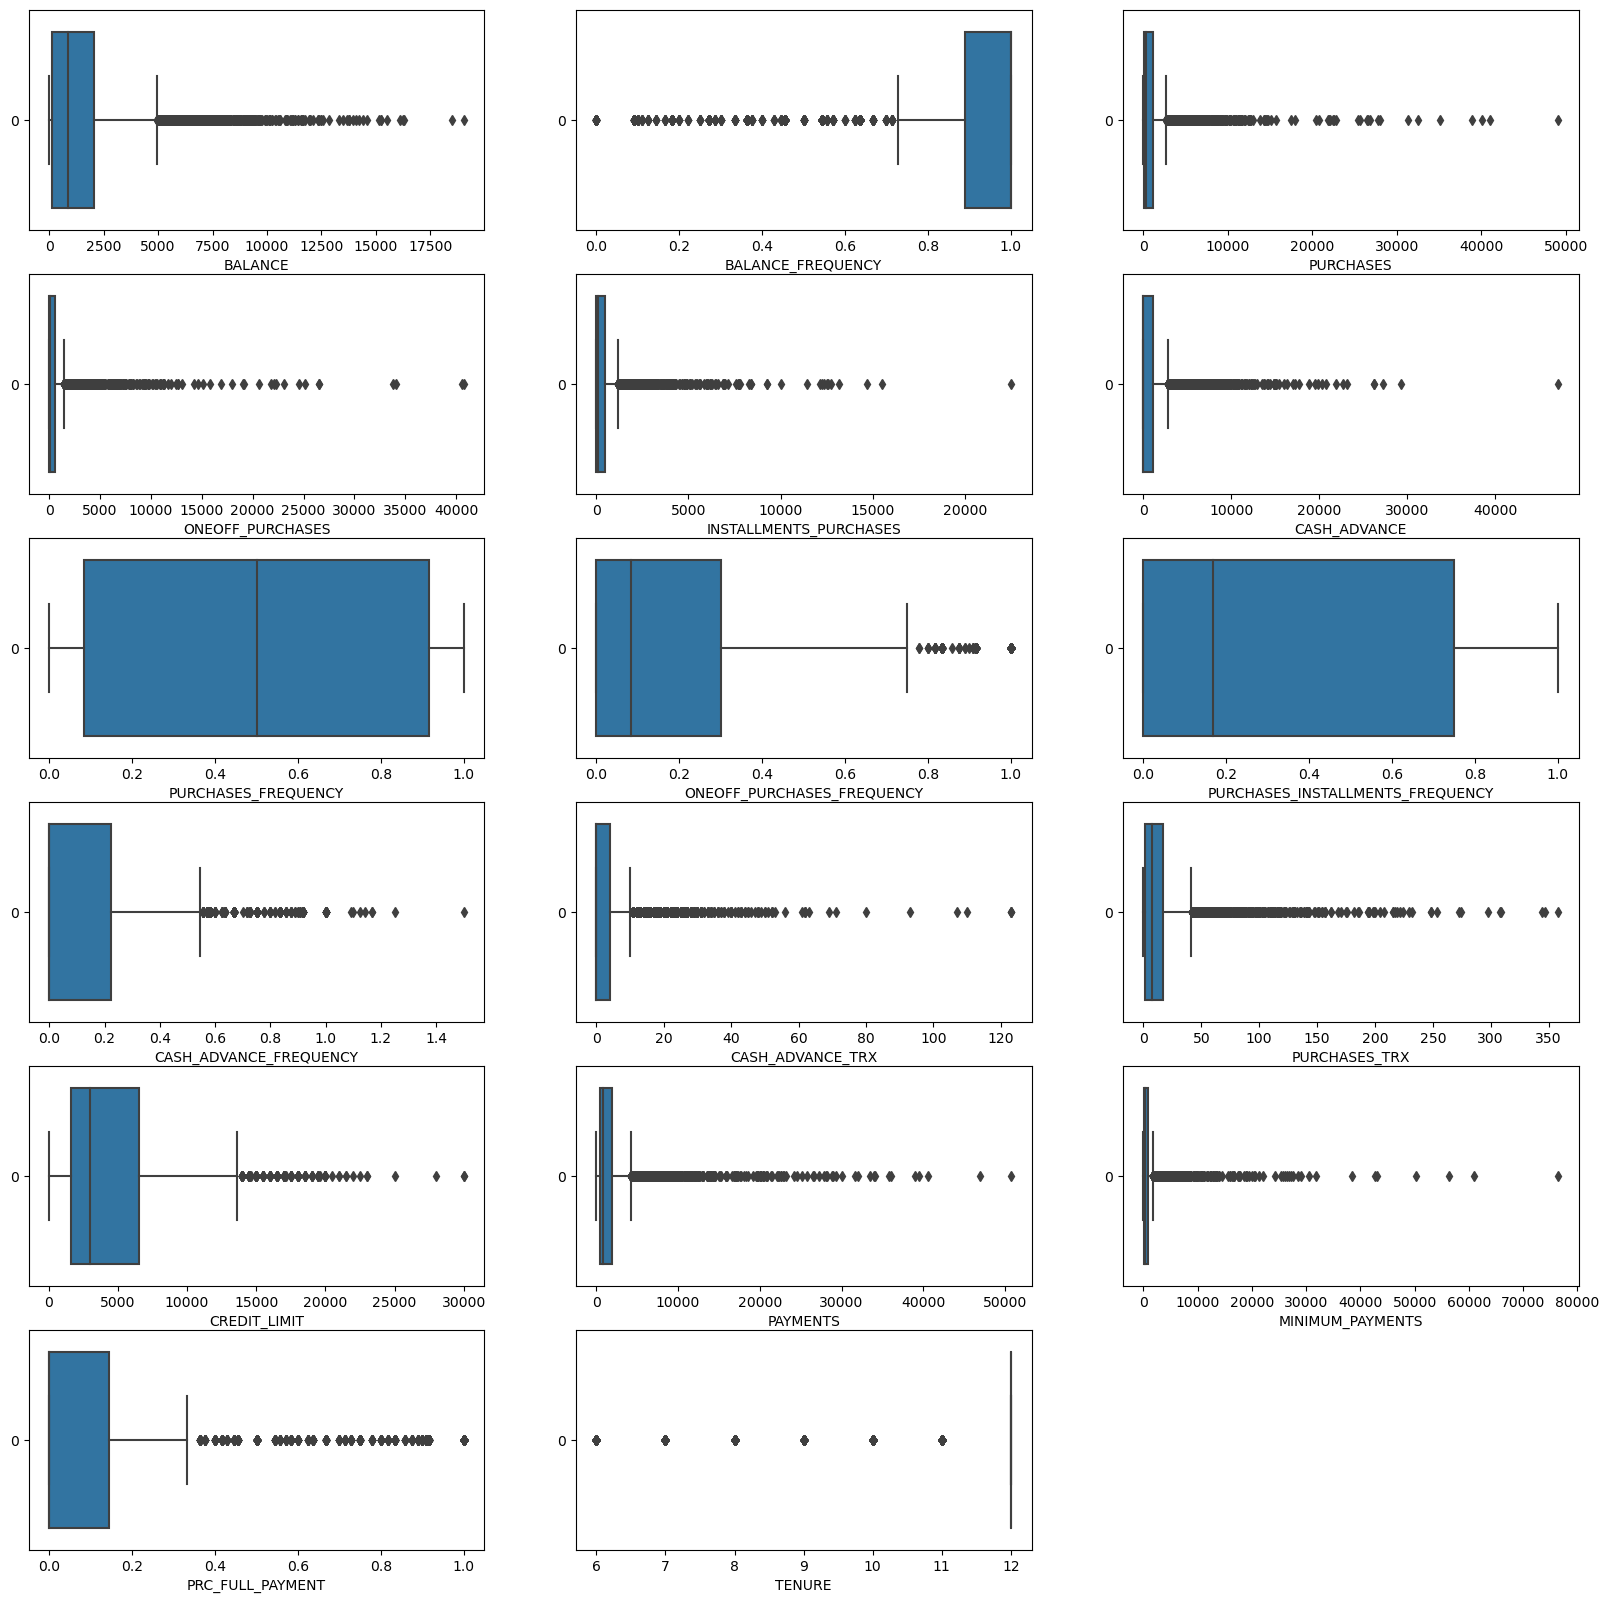

In [10]:
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

plt.figure(figsize=(20,20))
for i, col in enumerate( df.select_dtypes(include=[np.number]).columns):
    ax = plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(df[col], ax=ax,orient='h')
    plt.xlabel(col)
        
plt.show()

#### **Number of Outliers in each column**

In [11]:

for col in df.select_dtypes(include=[np.number]):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    Num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if Num_outliers != 0:
        print(f"Number of Outliers in column {col}: {Num_outliers}")
    else:
        print(f"No outliers in column {col}")
    print('============'*5)

Number of Outliers in column BALANCE: 695
Number of Outliers in column BALANCE_FREQUENCY: 1493
Number of Outliers in column PURCHASES: 808
Number of Outliers in column ONEOFF_PURCHASES: 1013
Number of Outliers in column INSTALLMENTS_PURCHASES: 867
Number of Outliers in column CASH_ADVANCE: 1030
No outliers in column PURCHASES_FREQUENCY
Number of Outliers in column ONEOFF_PURCHASES_FREQUENCY: 782
No outliers in column PURCHASES_INSTALLMENTS_FREQUENCY
Number of Outliers in column CASH_ADVANCE_FREQUENCY: 525
Number of Outliers in column CASH_ADVANCE_TRX: 804
Number of Outliers in column PURCHASES_TRX: 766
Number of Outliers in column CREDIT_LIMIT: 248
Number of Outliers in column PAYMENTS: 808
Number of Outliers in column MINIMUM_PAYMENTS: 841
Number of Outliers in column PRC_FULL_PAYMENT: 1474
Number of Outliers in column TENURE: 1366


Notes:
- all column contain Outliers except `PURCHASES_FREQUENCY` , `PURCHASES_FREQUENCY`

#### **Visualize Skewness**

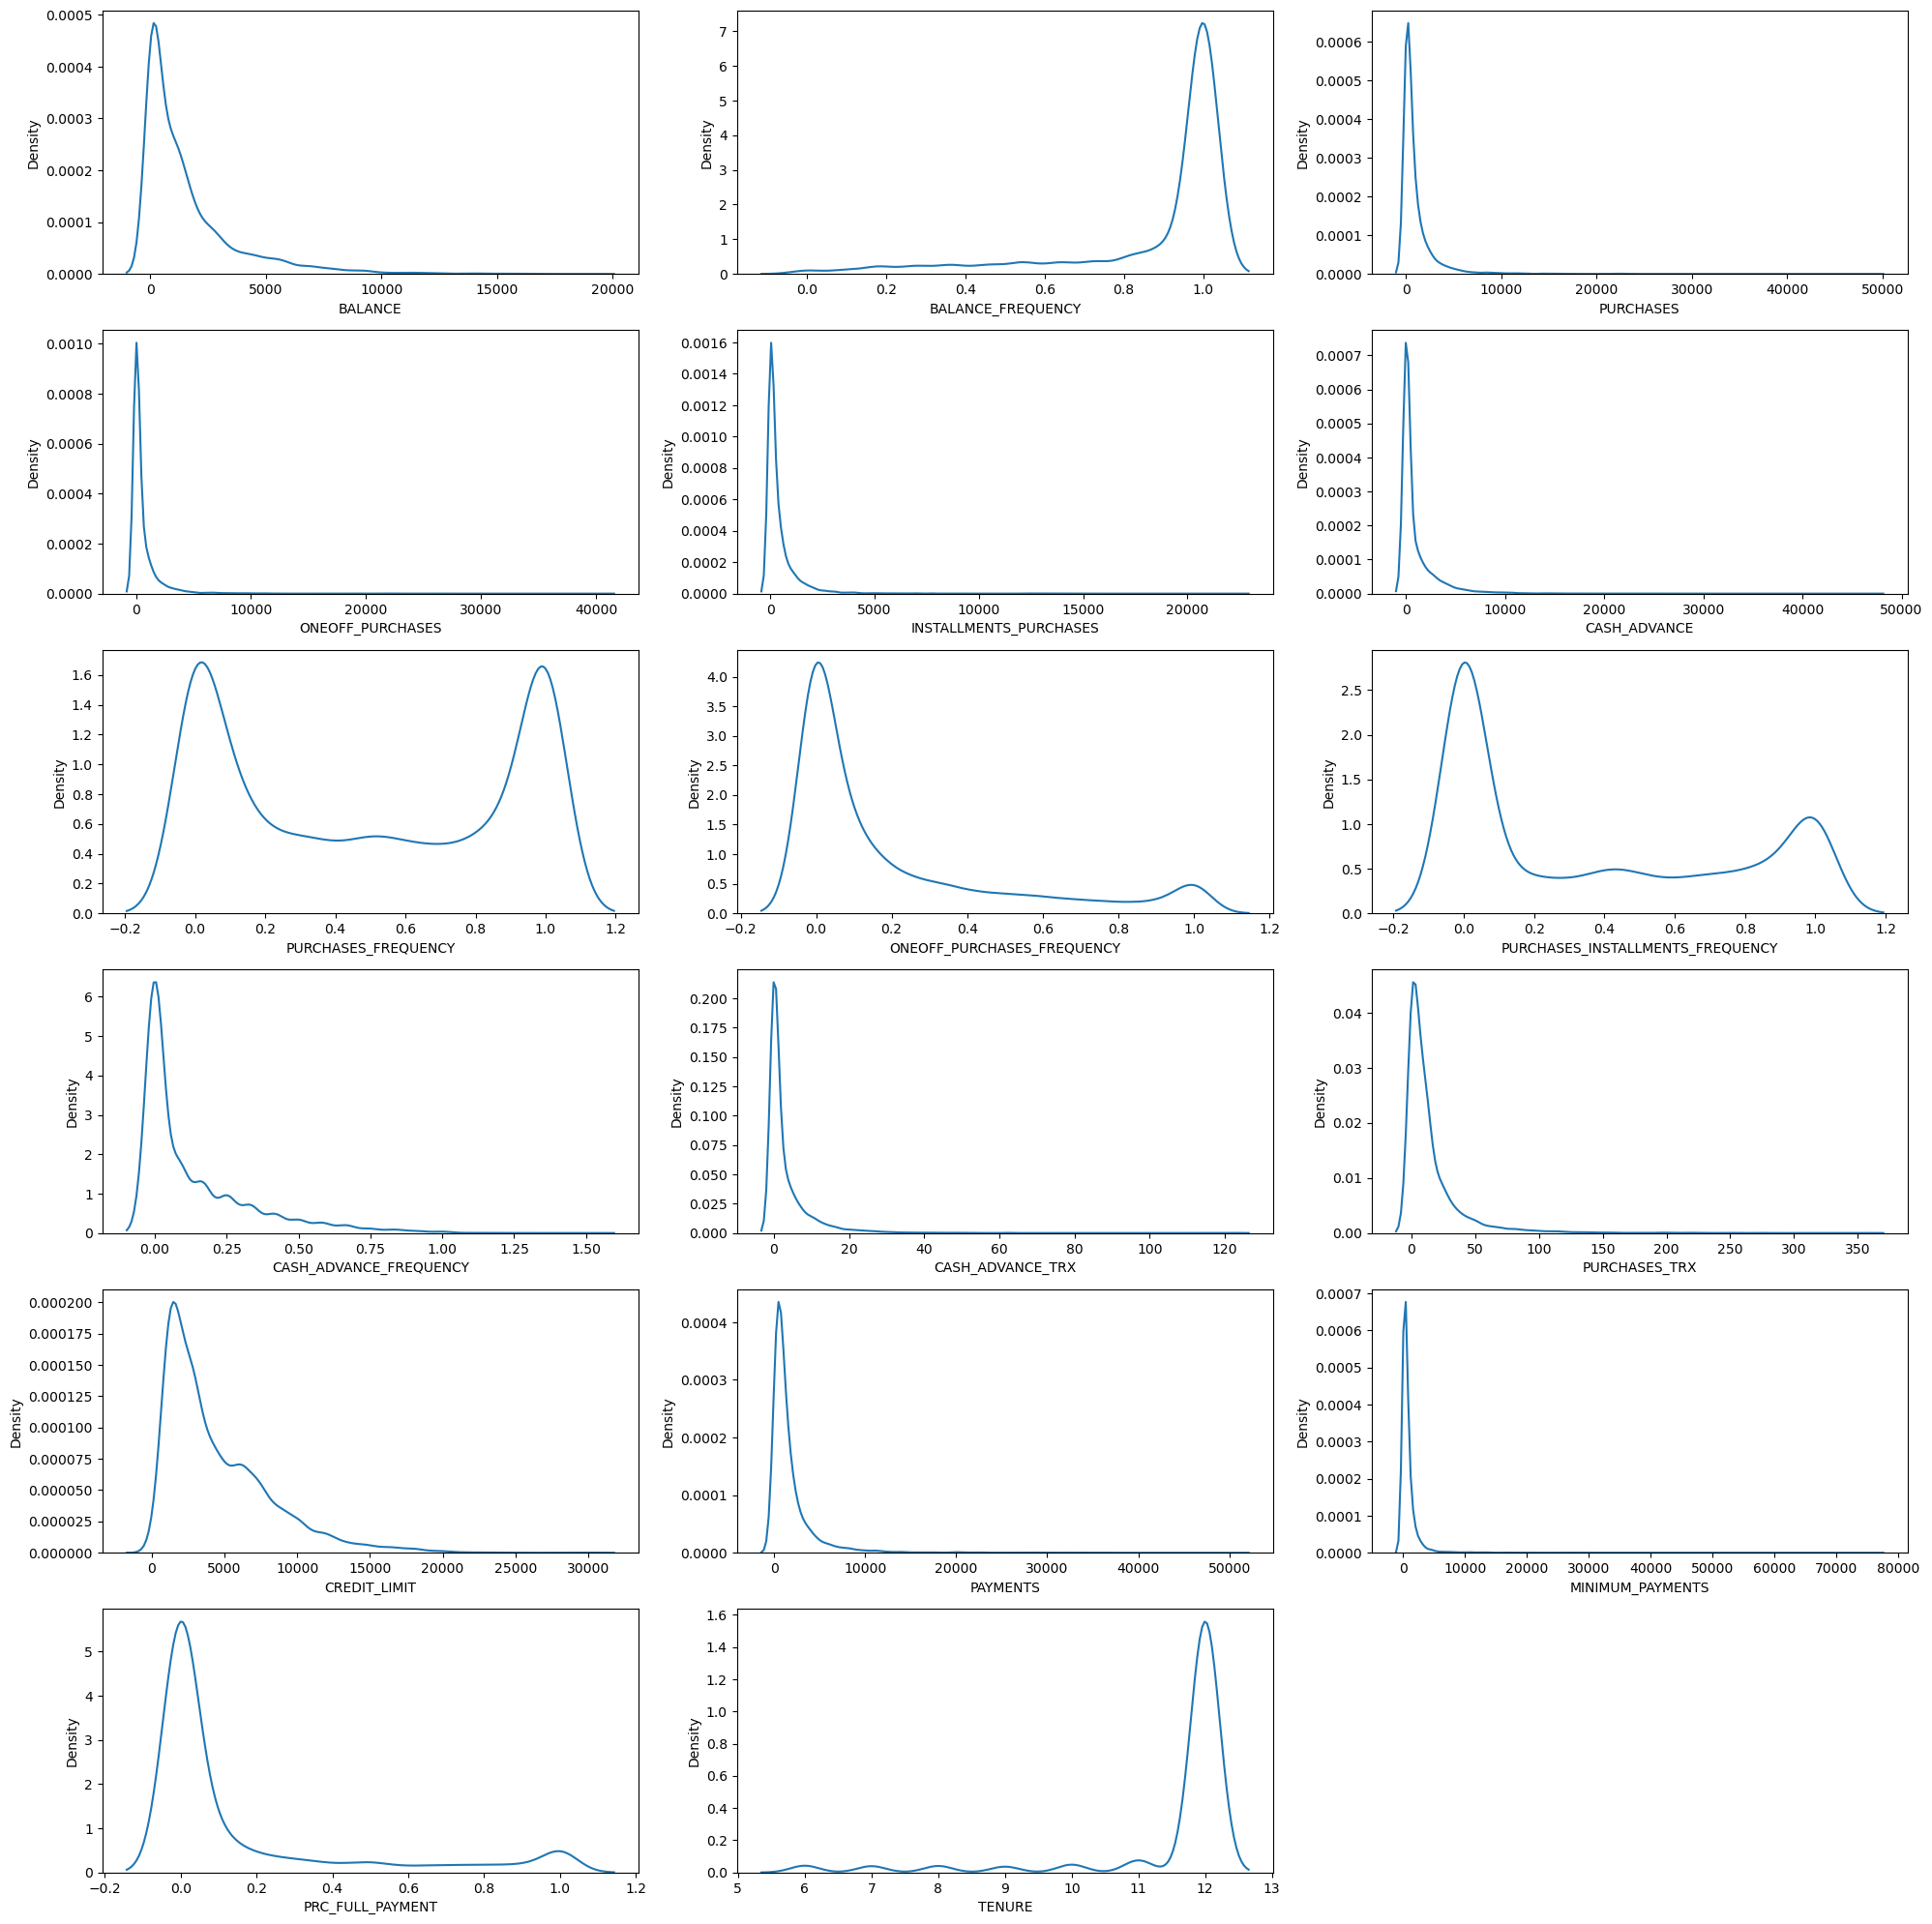

In [12]:
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

plt.figure(figsize=(20, 20))
for i, col in enumerate( df.select_dtypes(include=[np.number]).columns):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=df, x=col, ax=ax)
    plt.xlabel(col)
        
plt.tight_layout()
plt.show()

In [13]:
print(df.skew())

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64


Notes:
- Different Scale values 
- `TENURE`,`BALANCE_FREQUENCY`  Left Skewed Values 
- `PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY` have skewness values close to 0, indicating a relatively symmetrical distribution.
- `rest of the columns`  have positive skewness values, indicating that the distribution is right-skewed

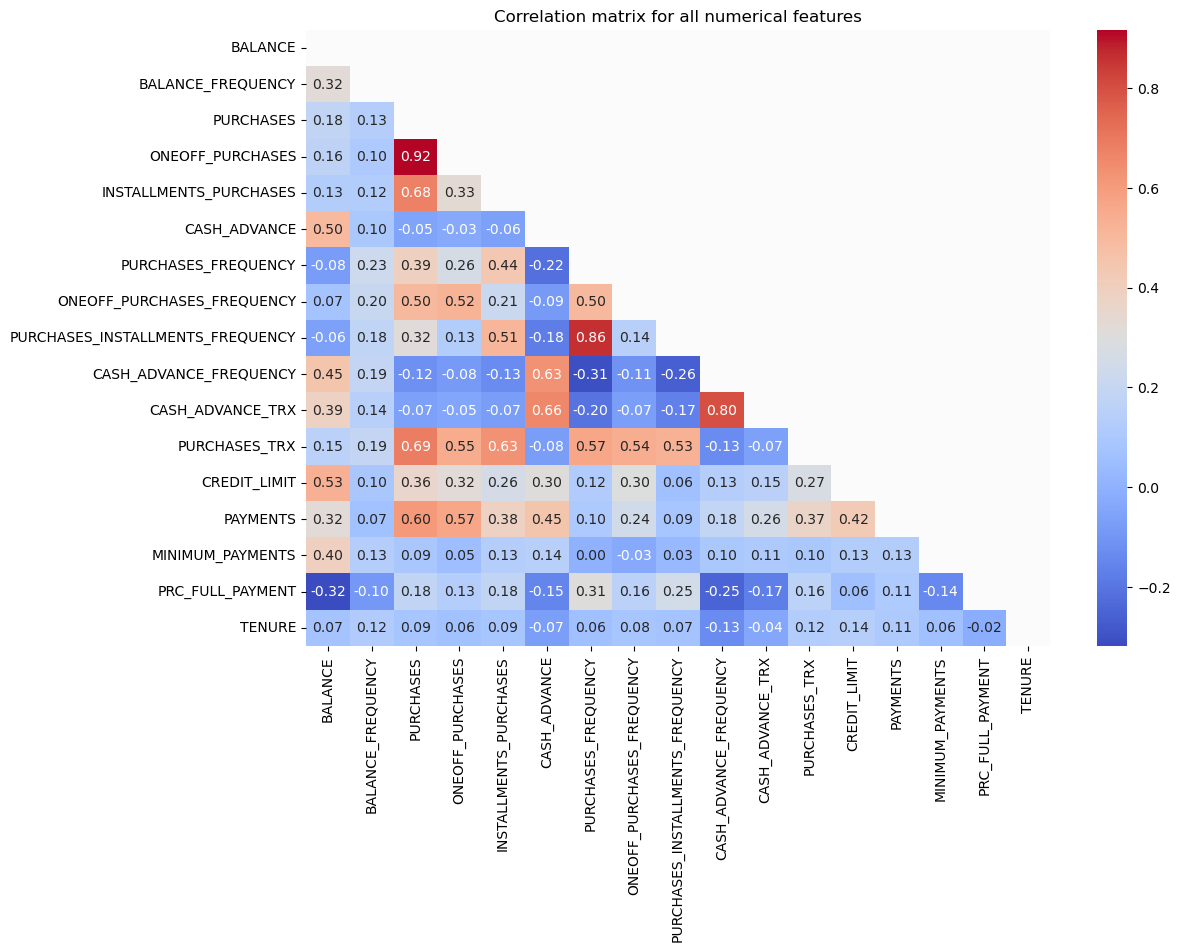

In [14]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=mask, annot_kws={"size":10})
ax.set_title("Correlation matrix for all numerical features")
ax.set_facecolor("#FBFBFB")

plt.show()

Notes :
- higher correlation between:
    - (`PURCHASES`, `ONEOFF_PURCHASES` ),
    - (`PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`)
    - (`CASH_ADVANCE_FREQUENCY`, `CASH_ADVANCE_TRX`)  

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1. Missing Values           <br>
2. Skewness data 
3. Outliers         <br>
4. Multicollinearity           <br>

In [15]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

#### **Missing Values**


**Sloution** :
- use knn algorithm to fill null value  -->> `KNNImputer`

In [16]:
# sloution

null_features = df_copy.isnull().sum()[df_copy.isnull().sum() > 0].index.tolist()
print("Features with null values:", null_features)


imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(df[null_features]),
                            columns=null_features)
df_copy = pd.concat([df_copy.drop(null_features, axis=1), imputed_data], axis=1)

Features with null values: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


In [17]:
#test 
print('----------------------Before--------------------\n\n')
print(df[null_features].describe())
print('\n                 -\n')
print(df.isnull().sum())
print('\n\n---------------------After--------------------\n\n')
print(df_copy[null_features].describe())
print('\n                 -\n')
print(df_copy.isnull().sum())

----------------------Before--------------------


       CREDIT_LIMIT  MINIMUM_PAYMENTS
count   8949.000000       8637.000000
mean    4494.449450        864.206542
std     3638.815725       2372.446607
min       50.000000          0.019163
25%     1600.000000        169.123707
50%     3000.000000        312.343947
75%     6500.000000        825.485459
max    30000.000000      76406.207520

                 -

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                  

#### **Skewness data**

**Sloution:**
- `Power Transformation` for Right Skewed and Left Skewed

- I try this but this transfroms don't apply for **negitive values**

```python
df_copy[cols_right_skewed] = df_copy[cols_right_skewed].apply(lambda x: np.log(x+abs(x.min()+1)))
df_copy[cols_left_skewed] = df_copy[cols_left_skewed].apply(np.exp)
```
- so i choose `Power tranfromation` 

In [18]:
#solution 
cols_right_skewed = df_copy.skew()[df_copy.skew() > 1].index.tolist()
cols_left_skewed = df_copy.skew()[df_copy.skew() < -1].index.tolist()
print('Right skewed columns: ', cols_right_skewed)
print('Left skewed columns: ', cols_left_skewed)

columns_to_transform = cols_right_skewed + cols_left_skewed

pt = PowerTransformer()
transformed_data = pd.DataFrame(pt.fit_transform(df_copy[columns_to_transform]),
                                columns= columns_to_transform)

df_copy[columns_to_transform] = transformed_data

Right skewed columns:  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
Left skewed columns:  ['BALANCE_FREQUENCY', 'TENURE']


In [19]:
# test 
df_skew = df.skew().to_frame(name='skewness before')
df_copy_skew = df_copy.skew().to_frame(name='skewness after Power Transformation')
combined_df = pd.concat([df_skew, df_copy_skew], axis=1)

combined_df

,skewness before,skewness after Power Transformation
BALANCE,2.393386,-0.119428
BALANCE_FREQUENCY,-2.023266,-1.118938
PURCHASES,8.144269,-0.178677
ONEOFF_PURCHASES,10.045083,0.115147
INSTALLMENTS_PURCHASES,7.299120,-0.014843
CASH_ADVANCE,5.166609,0.188413
PURCHASES_FREQUENCY,0.060164,0.060164
ONEOFF_PURCHASES_FREQUENCY,1.535613,0.541358
PURCHASES_INSTALLMENTS_FREQUENCY,0.509201,0.509201
CASH_ADVANCE_FREQUENCY,1.828686,0.506434


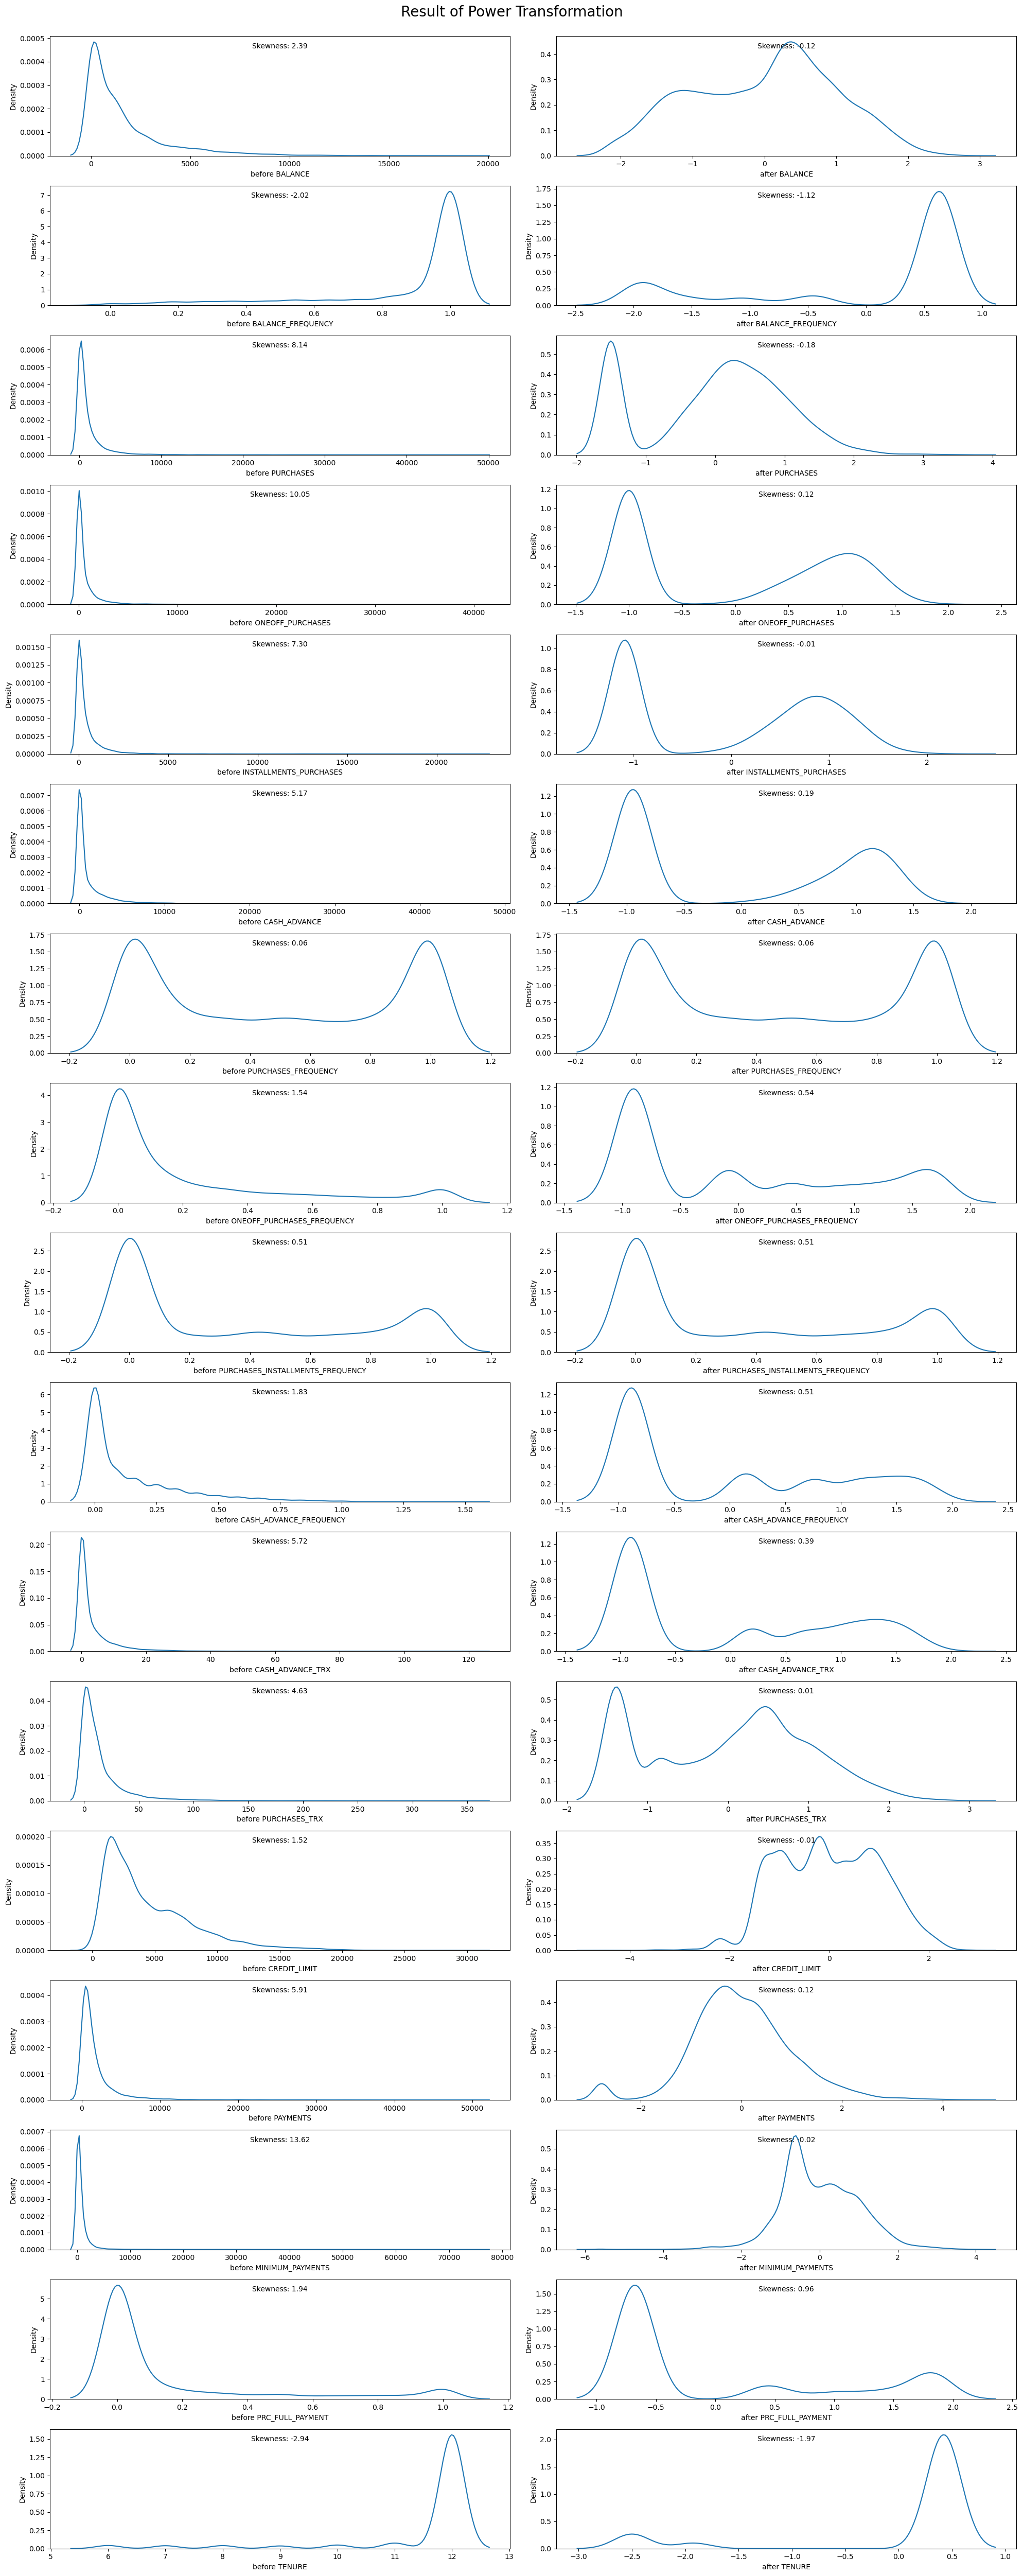

In [20]:
n_cols = 2
n_rows = 17

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 50))

for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.kdeplot(data=df[col], ax=axs[i, 0])
    axs[i, 0].set_xlabel('before ' + col)
    axs[i, 0].set_ylabel('Density')
    skewness_before = df[col].skew()
    axs[i, 0].text(0.5, 0.9, f"Skewness: {skewness_before:.2f}", transform=axs[i, 0].transAxes, ha='center')
    sns.kdeplot(data=df_copy[col], ax=axs[i, 1])
    axs[i, 1].set_xlabel('after ' + col)
    axs[i, 1].set_ylabel('Density')
    skewness_after = df_copy[col].skew()
    axs[i, 1].text(0.5, 0.9, f"Skewness: {skewness_after:.2f}", transform=axs[i, 1].transAxes, ha='center')
    
fig.suptitle('Result of Power Transformation', fontsize=20, y=1.00)
plt.tight_layout()
plt.show()

#### **Outliers Problem**

**Sloution:**
- l use `LocalOutlierFactorhape` for outlier detection 
- l try `IsolationForest` but no different then `IsolationForest`

so use `LocalOutlierFactorhape` or `IsolationForest` different is very small

``` python
isof = IsolationForest(contamination=0.01)
numrical_df = df_copy.select_dtypes(include=[np.number])
isof.fit(numrical_df)
outliers = isof.predict(numrical_df)
df_without_outliters_isof = pd.DataFrame(numrical_df[outliers == 1], columns=numrical_df.columns)
print("Original DataFrame:\n", df.select_dtypes(include=[np.number]).shape)
print('\nShape of Outliers:\n', numrical_df[outliers == -1].shape)
print("\nFiltered DataFrame:\n", df_without_outliters_isof.shape)

```
```
```

In [21]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
numrical_df = df_copy.select_dtypes(include=[np.number])
outliers = lof.fit_predict(numrical_df)

df_without_outliers = pd.DataFrame(numrical_df[outliers == 1], columns=numrical_df.columns)

print("Original DataFrame:\n", numrical_df.shape)
print("\nOutlier DataFrame:\n", numrical_df[outliers == -1].shape)
print("\nFiltered DataFrame:\n", df_without_outliers.shape)

Original DataFrame:
 (8950, 17)

Outlier DataFrame:
 (90, 17)

Filtered DataFrame:
 (8860, 17)


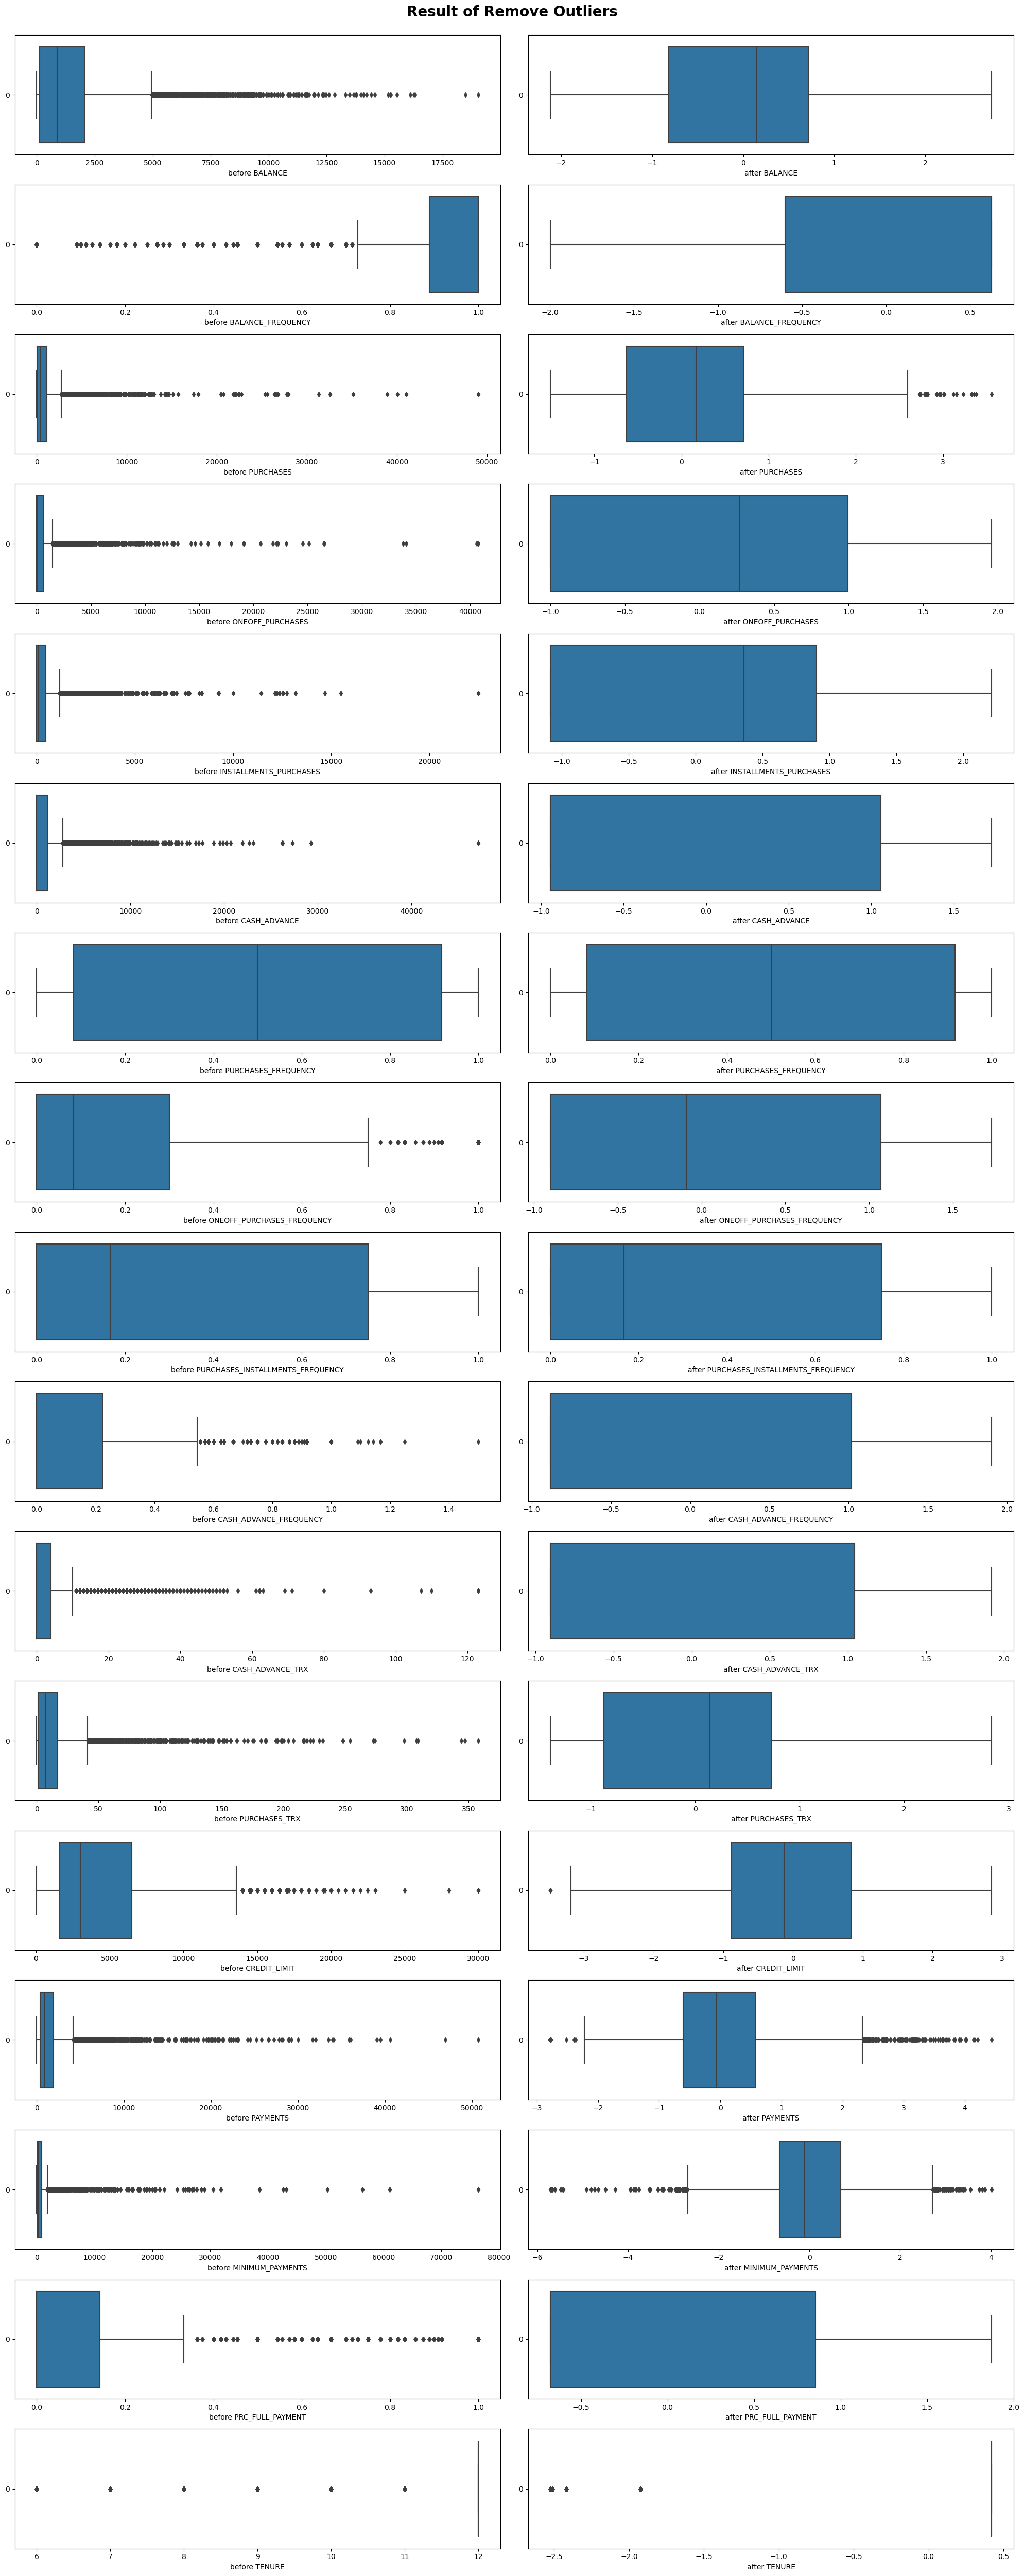

In [22]:
n_cols = 2
n_rows = 17

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 50))

for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axs[i, 0], orient='h')
    axs[i, 0].set_xlabel('before ' + col)
    sns.boxplot(data=df_without_outliers[col], ax=axs[i, 1], orient='h')
    axs[i, 1].set_xlabel('after ' + col)
    
fig.suptitle('Result of Remove Outliers', fontsize=20, y=1.00, fontweight='bold')
plt.tight_layout()
plt.show()

#### **MutiCollinearity Problem**

**Sloution:**
- PCA For reduce correlation between data 

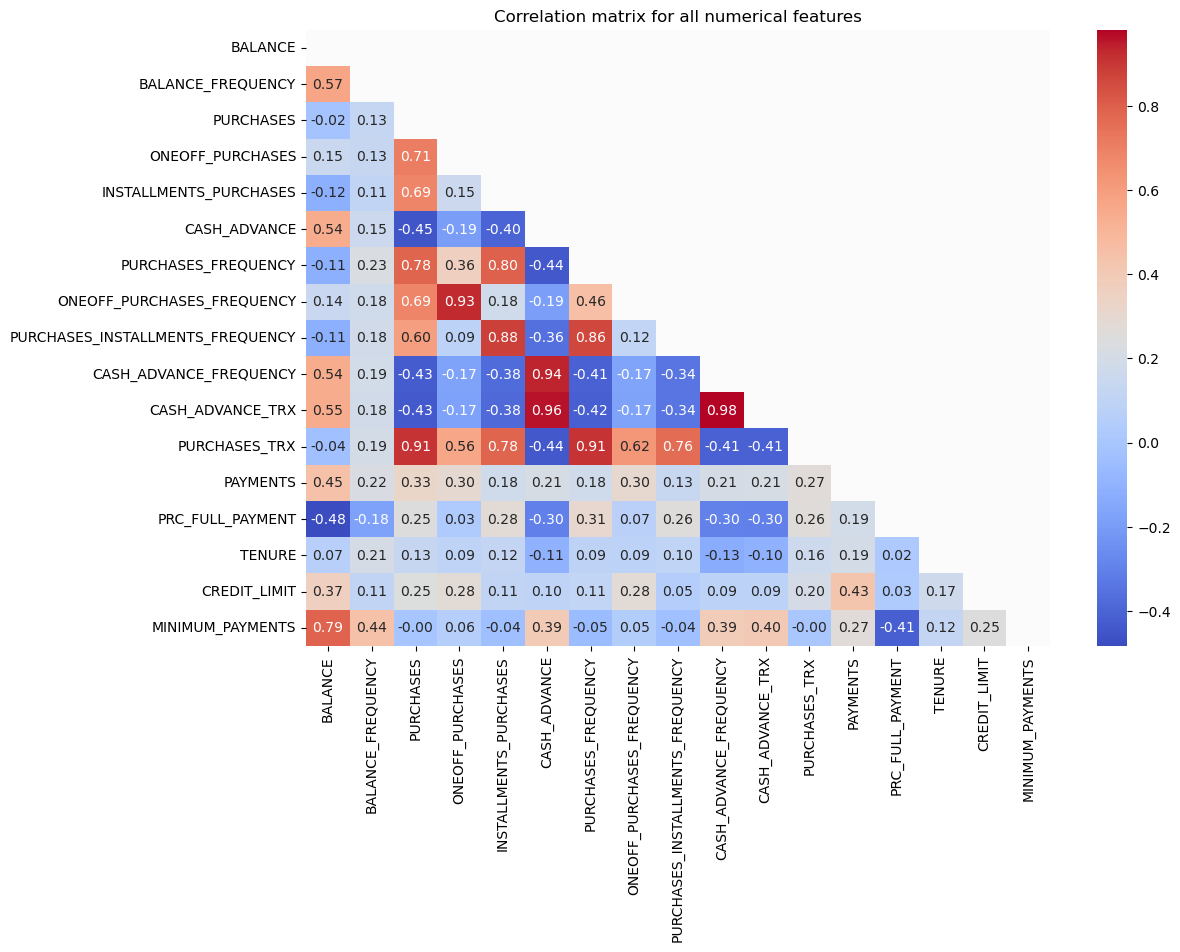

In [23]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(12,8))
ax = sns.heatmap(df_without_outliers.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=mask, annot_kws={"size":10})
ax.set_title("Correlation matrix for all numerical features")
ax.set_facecolor("#FBFBFB")

plt.show()

In [24]:
df_without_outliers.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_LIMIT,MINIMUM_PAYMENTS
BALANCE,1.000000,0.571793,-0.017383,0.148874,-0.117073,0.542329,-0.111878,0.144148,-0.114217,0.540555,0.545700,-0.037101,0.447557,-0.482920,0.065389,0.367719,0.788601
BALANCE_FREQUENCY,0.571793,1.000000,0.126773,0.131198,0.107030,0.154986,0.227175,0.178229,0.184272,0.187372,0.183818,0.194401,0.222966,-0.179918,0.205075,0.107927,0.443546
PURCHASES,-0.017383,0.126773,1.000000,0.710688,0.687003,-0.453928,0.782757,0.685041,0.595922,-0.426668,-0.432480,0.905938,0.325724,0.249693,0.134079,0.247249,-0.004685
ONEOFF_PURCHASES,0.148874,0.131198,0.710688,1.000000,0.154438,-0.193089,0.364208,0.927154,0.085305,-0.170834,-0.174882,0.563699,0.298942,0.027997,0.094379,0.279282,0.055297
INSTALLMENTS_PURCHASES,-0.117073,0.107030,0.687003,0.154438,1.000000,-0.398615,0.795325,0.178716,0.879830,-0.378886,-0.380951,0.784468,0.176676,0.280626,0.121160,0.107766,-0.041693
CASH_ADVANCE,0.542329,0.154986,-0.453928,-0.193089,-0.398615,1.000000,-0.438483,-0.191425,-0.360680,0.939150,0.961780,-0.439738,0.212152,-0.301571,-0.110731,0.098561,0.392897
PURCHASES_FREQUENCY,-0.111878,0.227175,0.782757,0.364208,0.795325,-0.438483,1.000000,0.456372,0.862680,-0.410851,-0.416446,0.910154,0.179611,0.308065,0.092863,0.114745,-0.054350
ONEOFF_PURCHASES_FREQUENCY,0.144148,0.178229,0.685041,0.927154,0.178716,-0.191425,0.456372,1.000000,0.116459,-0.165466,-0.172545,0.621575,0.303817,0.074062,0.087724,0.282249,0.047758
PURCHASES_INSTALLMENTS_FREQUENCY,-0.114217,0.184272,0.595922,0.085305,0.879830,-0.360680,0.862680,0.116459,1.000000,-0.342891,-0.344571,0.759452,0.134780,0.259228,0.100739,0.053886,-0.035648
CASH_ADVANCE_FREQUENCY,0.540555,0.187372,-0.426668,-0.170834,-0.378886,0.939150,-0.410851,-0.165466,-0.342891,1.000000,0.980047,-0.410030,0.206455,-0.298416,-0.129333,0.087065,0.387765


In [25]:
corr_matrix = df.corr()
pca = PCA(n_components=0.99)
pca.fit(df_without_outliers)

df_pca = pd.DataFrame(pca.transform(df_without_outliers), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12'])

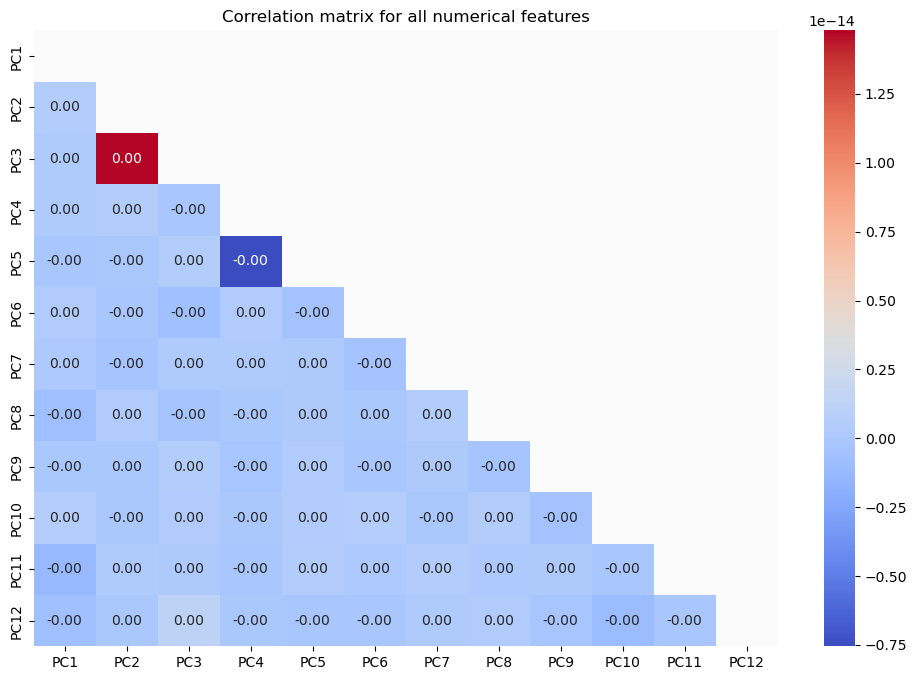

In [26]:
mask = np.triu(np.ones_like(df_pca.corr(), dtype=bool))

plt.figure(figsize=(12,8))
ax = sns.heatmap(df_pca.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=mask, annot_kws={"size":10})
ax.set_title("Correlation matrix for all numerical features")
ax.set_facecolor("#FBFBFB")

plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

- Feature scaling is the process of normalizing the range of features or variables in dataset, to ensure that they are on a consistent scale.
- This can be important for some machine learning algorithms that are sensitive to the scale of the input features,
- such as distance-based algorithms `knn`, `svm`, `kmeans`


note:

- dont need any transfromation becouese apply all need transfromation on my data to slove my **`issues`** 

In [27]:
from sklearn import preprocessing

In [28]:
df_pca.describe().round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
count,8860.000,8860.000,8860.000,8860.000,8860.000,8860.000,8860.000,8860.000,8860.000,8860.000,8860.000,8860.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000
std,2.250,1.930,1.171,1.129,1.031,0.890,0.805,0.700,0.607,0.343,0.329,0.312
min,-4.589,-5.155,-3.887,-3.509,-2.971,-3.487,-2.877,-2.530,-2.788,-1.704,-1.152,-1.314
25%,-2.069,-1.376,-0.751,-0.751,-0.701,-0.573,-0.488,-0.455,-0.327,-0.178,-0.226,-0.186
50%,0.541,-0.052,-0.058,-0.035,-0.139,0.027,0.053,-0.031,-0.001,0.014,-0.042,-0.009
75%,1.782,1.278,0.776,0.804,0.598,0.595,0.560,0.436,0.360,0.193,0.214,0.180
max,5.072,6.763,4.691,3.568,3.897,3.536,2.904,3.331,4.047,1.722,2.055,2.183


## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data </br>
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result </br>
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia) </br>
4- (Optionally) make a method that pick the best number of clusters for you </br>
5- Using different techniques for scaling and comment on the result

1. Use the k means class that you implemented in the previous task to cluster this data



#### **Answer:**

In [29]:
X = df_pca.values

In [30]:
class KMeans_From_Scratch:
    def __init__(self, n_clusters=3, max_iter=100000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def kMeansInitCentroids(self, X):
        m, n = X.shape
        centroids = np.zeros((self.n_clusters, n))
        rand_indices = np.random.choice(m, self.n_clusters, replace=False)
        centroids = X[rand_indices]
        return centroids

    def findClosestCentroids(self, X):
        m = X.shape[0]
        distances = np.zeros((m, self.n_clusters))
        for i in range(self.n_clusters):
            distances[:,i] = np.sqrt(np.sum((X - self.centroids[i])**2, axis=1))
        idx = np.argmin(distances, axis=1)
        return idx

    def computeCentroids(self, X, idx):
        n = X.shape[1]
        centroids = np.zeros((self.n_clusters, n))
        for i in range(self.n_clusters):
            datapoints = X[idx == i]
            if datapoints.shape[0] > 0:
                centroids[i] = np.mean(datapoints, axis=0)
        return centroids

    def fit(self, X):
        self.centroids = self.kMeansInitCentroids(X)
        idx = np.zeros(X.shape[0])
        for i in range(self.max_iter):
            old_idx = idx
            idx = self.findClosestCentroids(X)
            if np.array_equal(idx, old_idx):
                break
            self.centroids = self.computeCentroids(X, idx)

    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:,i] = np.sqrt(np.sum((X - self.centroids[i])**2, axis=1))
        labels = np.argmin(distances, axis=1)
        return labels 

In [31]:
kmeans_from_scratch = KMeans_From_Scratch(4)
kmeans_from_scratch.fit(X)
df_pca['clusters_scratch_class'] = kmeans_from_scratch.predict(X)

In [32]:
df_pca['clusters_scratch_class'].value_counts()

2    2546
3    2379
0    2201
1    1734
Name: clusters_scratch_class, dtype: int64

2. Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result

#### **Answer:**

In [33]:
kmeans = KMeans(4)
kmeans.fit(X)
df_pca['clusters_kmeans'] = kmeans.predict(X)

In [34]:
df_pca['clusters_kmeans'].value_counts()

0    2556
1    2379
2    2189
3    1736
Name: clusters_kmeans, dtype: int64

In [35]:
shape_similar_data_cluster = df_pca[df_pca['clusters_kmeans']==df_pca['clusters_scratch_class']].shape
shape_different_data_cluster = df_pca[df_pca['clusters_kmeans']!=df_pca['clusters_scratch_class']].shape
print('shape similar data cluster:\n',shape_similar_data_cluster)
print('\nshape different data cluster:\n',shape_different_data_cluster)

shape similar data cluster:
 (13, 14)

shape different data cluster:
 (8847, 14)


[133902.6308223931, 97831.47569940482, 81458.06527113068, 71431.74080142754, 66027.55052891659, 61928.142730941385, 58009.46128295157, 55179.665267570876, 52429.88527681042, 50421.164207091206]


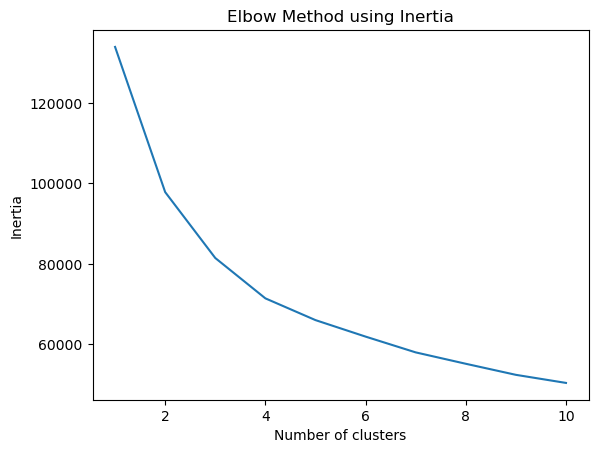

In [36]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method using Inertia')
print(inertia)
plt.show()

4. (Optionally) make a method that pick the best number of clusters for you

#### **Answer:**

**mehtod by slope but  method is `failed` discovered Optimal K:**
```python
def find_optimal_k(X, max_k=10):
    inertia = []
    distortion = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    elbow = 1
    slope_prev = float('inf')
    for i in range(1, len(inertia) - 1):
        slope = (inertia[i] - inertia[i+1]) 
        if slope < slope_prev:
            elbow = i
            break
        slope_prev = slope
    return elbow
print(find_optimal_k(df_pca.values))
```
output:
```
1
```

In [37]:
def find_optimal_k(X, max_k=10):
    inertia = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    elbow = 1
    for i in range(1, len(inertia) - 1):
        if inertia[i] - inertia[i+1] < 0.1 * (inertia[0] - inertia[-1]):
            elbow = i + 1
            break
    return elbow

In [38]:
optimal_k = find_optimal_k(X)
print(optimal_k)

4


{'StandardScaler': 83953.75185794427, 'MinMaxScaler': 1388.8519297684525, 'RobustScaler': 52376.56033503753}


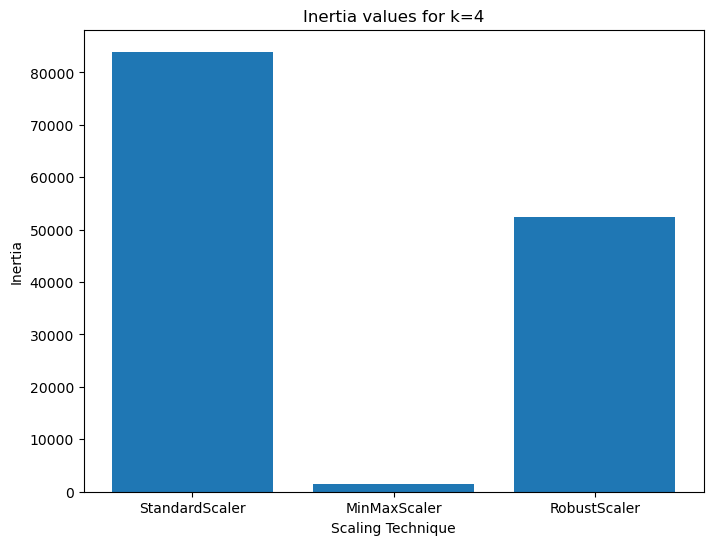

In [39]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}
k = optimal_k
inertias = {}
for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    inertias[name] = inertia

print(inertias)
plt.figure(figsize=(8, 6))
plt.bar(inertias.keys(), inertias.values())
plt.title(f'Inertia values for k={k}')
plt.xlabel('Scaling Technique')
plt.ylabel('Inertia')
plt.show()

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters<br>
- Complete-Linkage Clustering<br>
- Single-Linkage Clustering<br>
- Average-Linkage Clustering<br>
- Centroid Linkage Clustering </br>
- ward Linkage clustering


2- Distance function:<br>
- Euclidean Distance <br>
- Manhattan Distance <br>
- Mahalanobis distance </br>

3-Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

- Euclidean distance: metric='euclidean'
- Manhattan distance: metric='cityblock'
- Mahalanobis distance: metric='mahalanobis'

done complete
done single
done average
done centroid
done ward


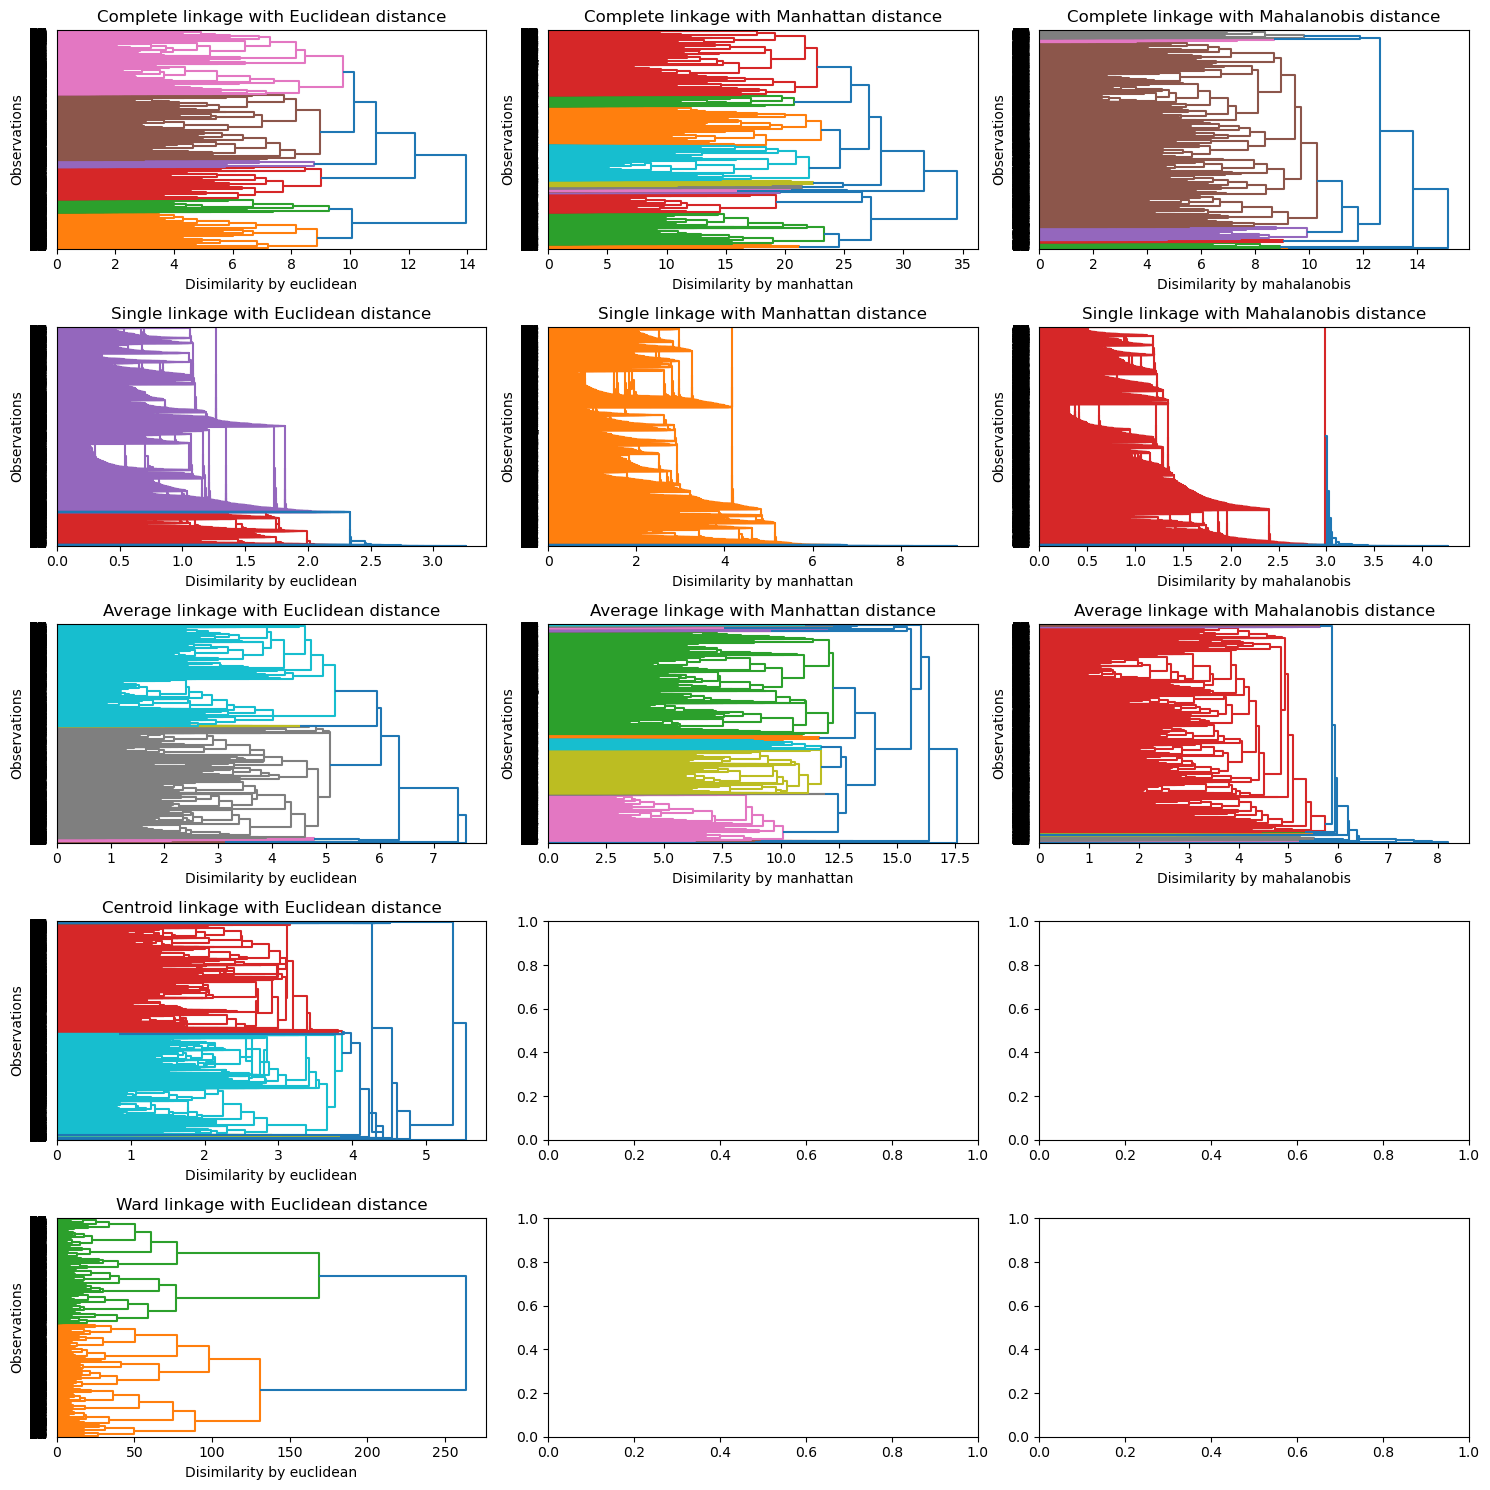

In [40]:
import scipy.cluster.hierarchy as shc

linkage_criteria = ['complete', 'single', 'average', 'centroid', 'ward']
distance_metrics = ['euclidean', 'cityblock', 'mahalanobis']
distance_functions = ['euclidean', 'manhattan', 'mahalanobis']
fig, axes = plt.subplots(len(linkage_criteria), len(distance_functions), figsize=(15, 15))
for i, linkage in enumerate(linkage_criteria):
    for j, distance in enumerate(distance_metrics):
        if (linkage in ['centroid','ward'] and distance == 'euclidean') or not(linkage in ['centroid','ward']):
            dend = shc.dendrogram(shc.linkage(X, method=linkage, metric=distance), ax=axes[i, j], orientation='right')
            axes[i, j].set_title(f'{linkage.capitalize()} linkage with {distance_functions[j].capitalize()} distance')
            axes[i, j].set_xlabel('Disimilarity by '+ distance_functions[j])
            axes[i, j].set_ylabel('Observations')
    print('done',linkage)
plt.tight_layout()
plt.show()

#### **I choose `two` combination from above:**
- `Ward` Linkage with `Euclidean` Distance with `4` clusters 
- `Complete` Linkage With `Euclidean` Distance with `6` clusters

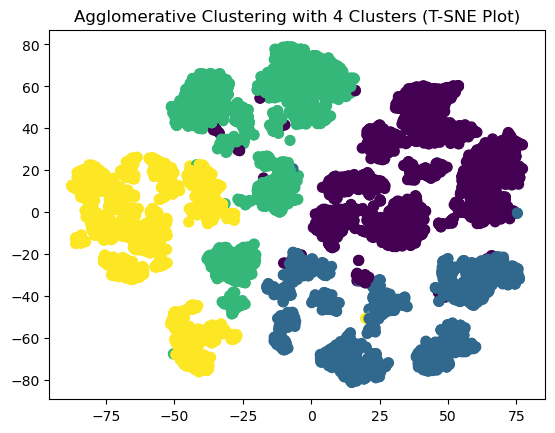

In [41]:
hierarchal_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
y_pred = hierarchal_clustering.fit_predict(X)

# Visualize the results using T-SNE 2D plot
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(df_without_outliers)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, s=50, cmap='viridis')
plt.title('Agglomerative Clustering with 4 Clusters (T-SNE Plot)')
plt.show()

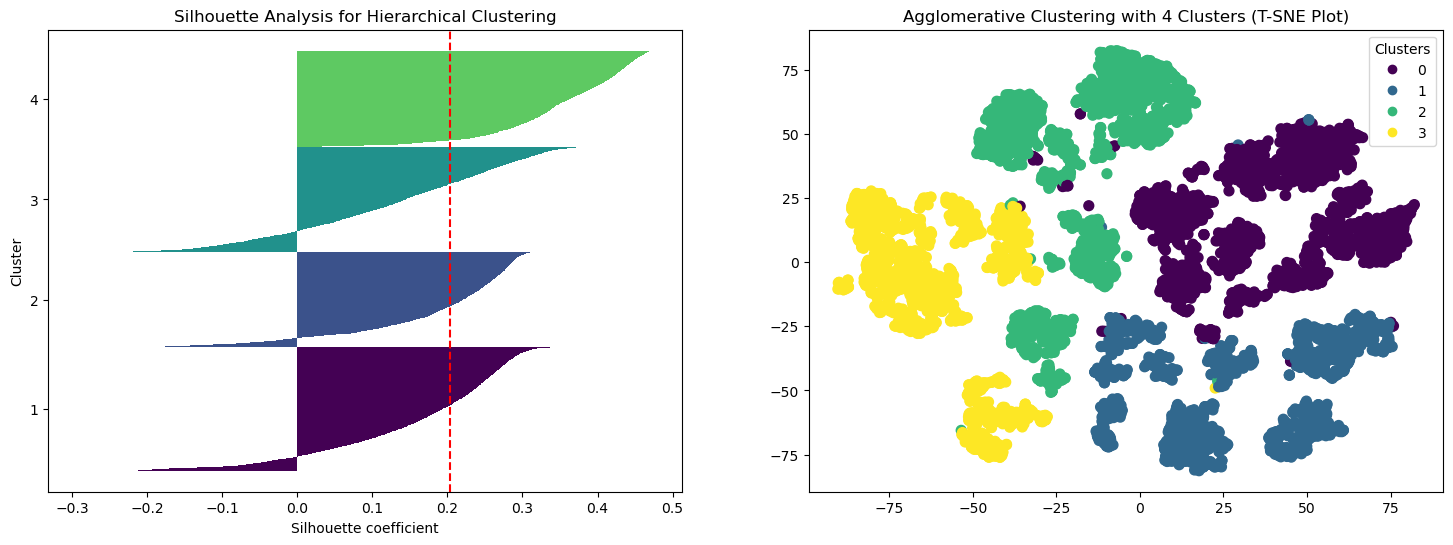

In [42]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
y_pred = hierarchical_clustering.fit_predict(X)

silhouette_vals = silhouette_samples(X, y_pred)
silhouette_avg = silhouette_score(X, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
cluster_labels = np.unique(y_pred)
n_clusters = cluster_labels.shape[0]
y_lower, y_upper = 0, 0
yticks = []
colors = plt.cm.viridis(cluster_labels.astype(float) / n_clusters)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_pred == c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = colors[i]
    ax1.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_lower + y_upper) / 2.)
    y_lower += len(c_silhouette_vals)

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks(yticks)
ax1.set_yticklabels(cluster_labels + 1)
ax1.set_ylabel('Cluster')
ax1.set_xlabel('Silhouette coefficient')
ax1.set_title('Silhouette Analysis for Hierarchical Clustering')


# Visualize the T-SNE scatter plot
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
scatter = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, s=50, cmap='viridis')
ax2.set_title('Agglomerative Clustering with 4 Clusters (T-SNE Plot)')
legend = ax2.legend(*scatter.legend_elements(), loc="best", title="Clusters")

plt.show()

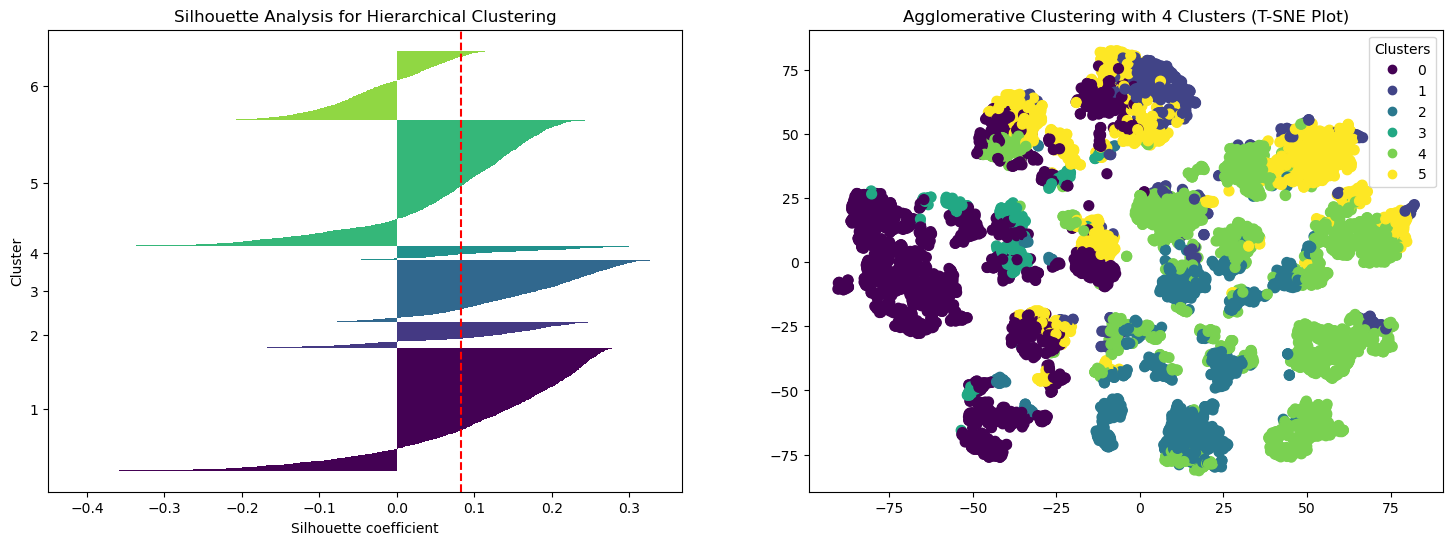

In [43]:
hierarchal_clustering = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean')
y_pred = hierarchal_clustering.fit_predict(X)

silhouette_vals = silhouette_samples(X, y_pred)
silhouette_avg = silhouette_score(X, y_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
cluster_labels = np.unique(y_pred)
n_clusters = cluster_labels.shape[0]
y_lower, y_upper = 0, 0
yticks = []
colors = plt.cm.viridis(cluster_labels.astype(float) / n_clusters)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_pred == c]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = colors[i]
    ax1.barh(range(y_lower, y_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_lower + y_upper) / 2.)
    y_lower += len(c_silhouette_vals)

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks(yticks)
ax1.set_yticklabels(cluster_labels + 1)
ax1.set_ylabel('Cluster')
ax1.set_xlabel('Silhouette coefficient')
ax1.set_title('Silhouette Analysis for Hierarchical Clustering')


# Visualize the T-SNE scatter plot
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)
scatter = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, s=50, cmap='viridis')
ax2.set_title('Agglomerative Clustering with 4 Clusters (T-SNE Plot)')
legend = ax2.legend(*scatter.legend_elements(), loc="best", title="Clusters")

plt.show()

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
    - I tried it to `slove muticollinearity`
    
    ``` python
        pca = PCA(n_components=0.99)
        pca.fit(df_without_outliers)

        df_pca = pd.DataFrame(pca.transform(df_without_outliers), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12'])
    ```


- Try to run your code again but with different tranformation technique
    - I tried it
    ```python
        df_copy[cols_right_skewed] = df_copy[cols_right_skewed].apply(lambda x: np.log(x+abs(x.min()+1)))
        df_copy[cols_left_skewed] = df_copy[cols_left_skewed].apply(np.exp)
    ```
    - tried it to `Skewness`
    ``` python
        pt = PowerTransformer()
        transformed_data = pd.DataFrame(pt.fit_transform(df_copy[columns_to_transform]),
                                        columns= columns_to_transform)
    ```
    
    - tried it to compare between them
    ```python 
        scalers = {
            'StandardScaler': StandardScaler(),
            'MinMaxScaler': MinMaxScaler(),
            'RobustScaler': RobustScaler(),
        }
        k = optimal_k
        inertias = {}
        for name, scaler in scalers.items():
            X_scaled = scaler.fit_transform(X)
            kmeans = KMeans(n_clusters=k, random_state=0)
            kmeans.fit(X_scaled)
            labels = kmeans.labels_
            inertia = kmeans.inertia_
            inertias[name] = inertia
    ``` 